## RC4

File name:revil.bin

SHA256: 329983DC2A23BD951B24780947CB9A6AE3FB80D5EF546E8538DFD9459B176483

The sample uses RC4 algorithm to decrypt the second stage payload from its enc section.

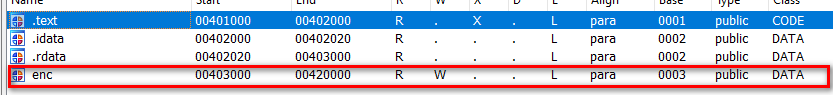

The RC4 algorithm exists in function 0x0040110B. Its hard-coded RC4 key is: kZlXjn3o373483wb6ne1LIBNWD3KWBEK

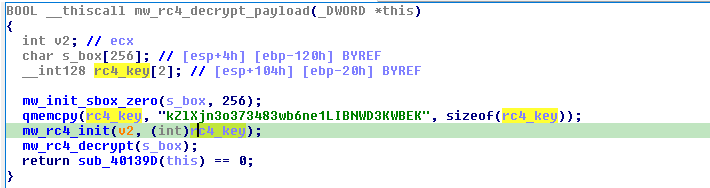

Function mw_rc4_init is KSA which is used to initialize S box. A variable-length key from 1 to 256 bytes is used to initialize a 256-byte state vector S, with elements S[0] to S[255]. Function mw_rc4_decrypt is used to decrypt the encrypted payload.The encrypted data length is 0x1CE00.

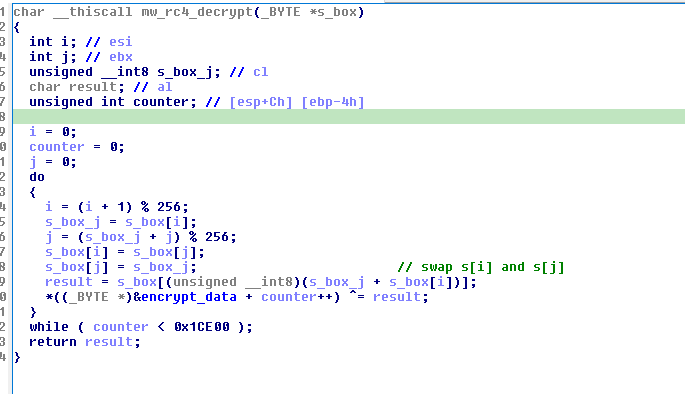


Note the encrypte_data starts from the section enc:

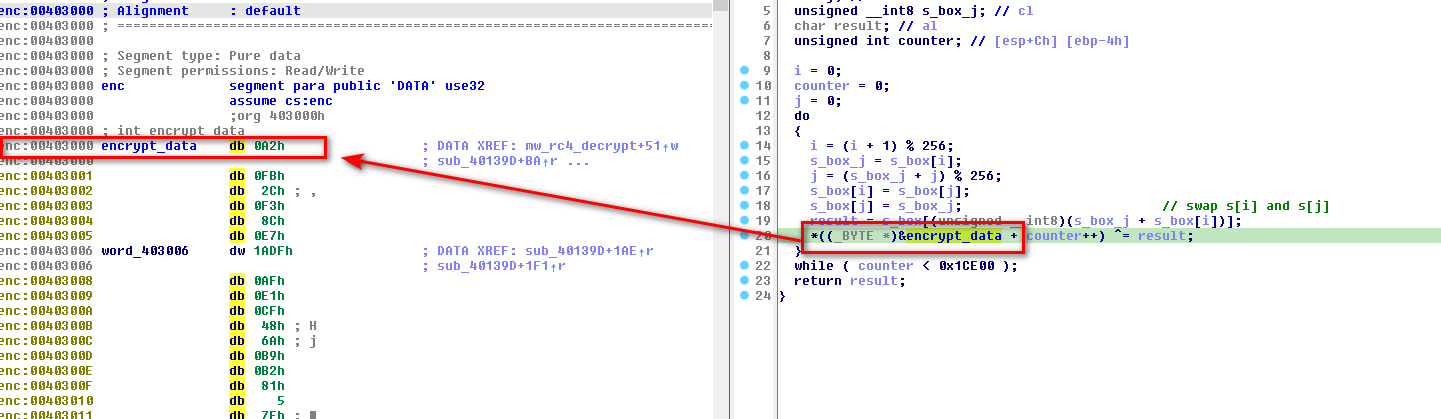

To decrypt the RC4 encrypted payload, I created a simple Python script:

In [12]:
import pefile
from arc4 import ARC4

pe = pefile.PE("/tmp/revil.bin")
section_name = 'enc'
key = b'kZlXjn3o373483wb6ne1LIBNWD3KWBEK'

for section in pe.sections:
    if bytes(section_name, 'utf-8') in section.Name:
        enc_data = section.get_data()

        
arc4 = ARC4(key)
dec = arc4.decrypt(enc_data)

f = open("/tmp/dec.bin", "wb")
f.write(dec)
f.close()

## Blowfish

Filename: sendsafe.bin
    
SHA256: 36684CEF31A4A43473D5B12D30AABF94F56E407B0EEEC14B7C1CB87EFA3159B6    

Capa recongnizes Blowfish encryption algorithm is used in function mw_blowfish (0x00421D20).

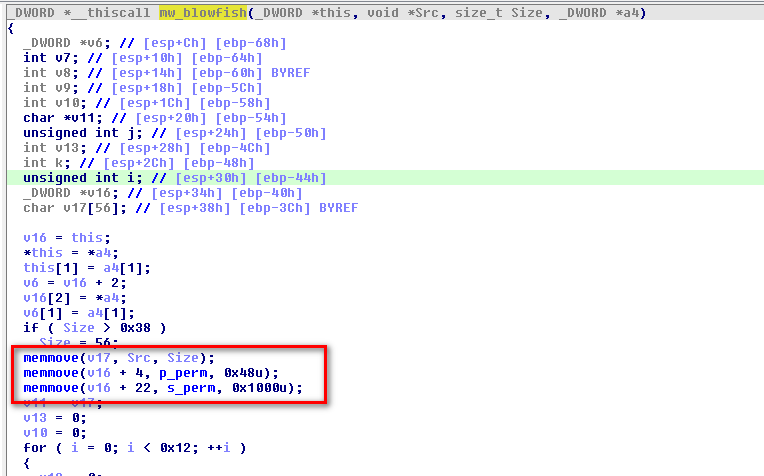

Noticed that there are two constant values p_perm and s_perm are used in this function. These two static values are from https://github.com/B-Con/crypto-algorithms/blob/master/blowfish.c

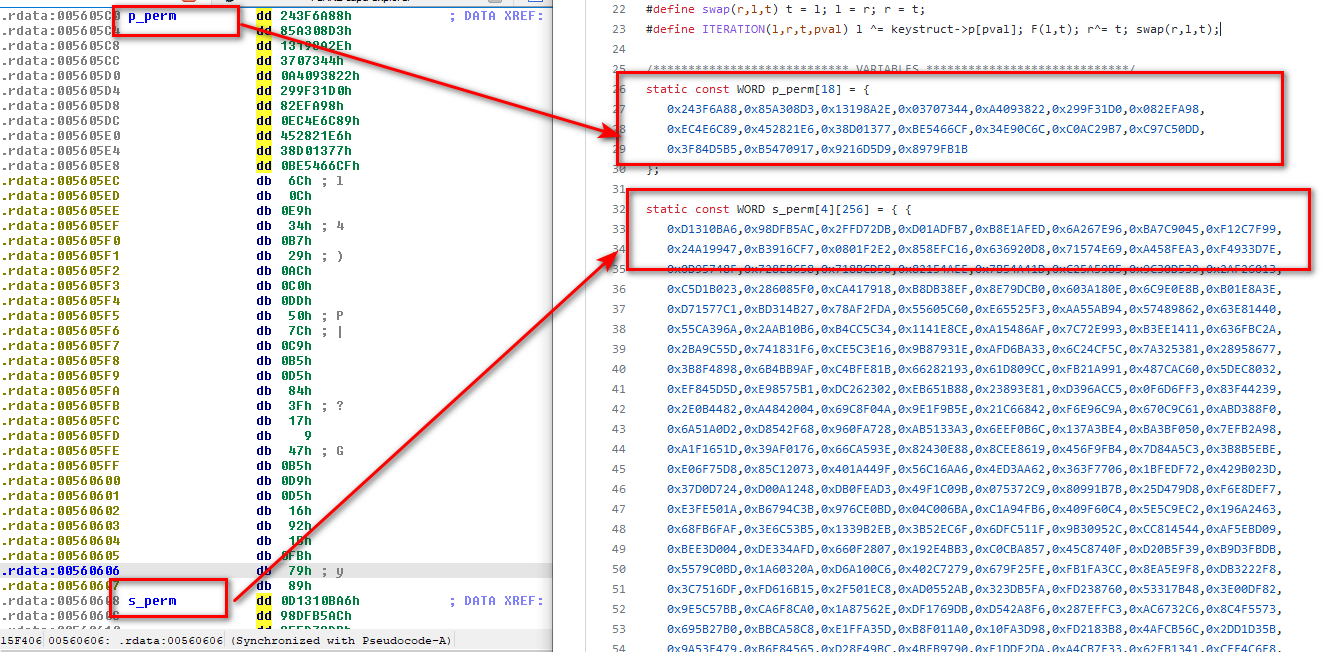

The decompiled code is similar with the code from blowfish.c.

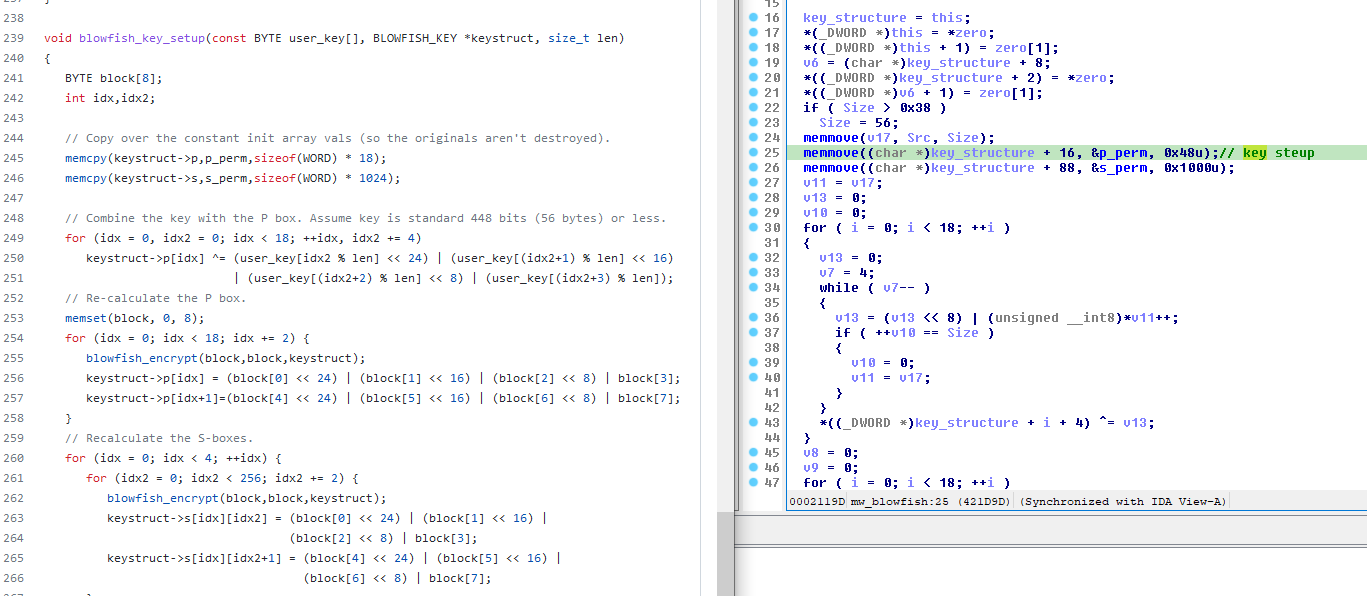

The sample attempts to decrypt data locates at its binary's resouce section.

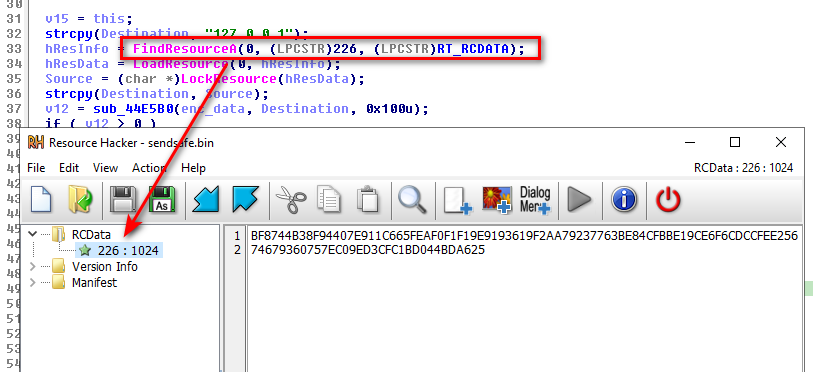


and the key is:0x075408D567859EE2AFE3C6A98F3B0C5B

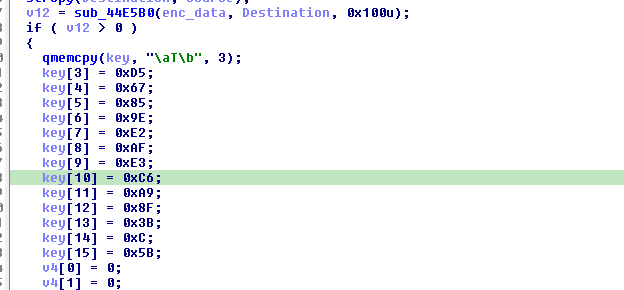


In [4]:
from Crypto.Cipher import Blowfish
import binascii

In [7]:
enc_string = "BF8744B38F94407E911C665FEAF0F1F19E9193619F2AA79237763BE84CFBBE19CE6F6CDCCFEE25674679360757EC09ED3CFC1BD044BDA625"
enc_data = binascii.unhexlify(enc_string.encode('utf-8'))

key_string = "075408D567859EE2AFE3C6A98F3B0C5B"
key = binascii.unhexlify(key_string.encode('utf-8'))

cipher = Blowfish.new(key, Blowfish.MODE_ECB)
dec = cipher.decrypt(enc_data)
print(dec)

b'195.2.240.119:50055/50056;Enterprise Mailing Service\x00\x00\x00\x00'
